#### cyrus helped make this code but he made it fast so he acknowledges its terrible


In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

sb.set(style="darkgrid")

In [2]:
pd.read_csv('data.csv')

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Time,"T° 575,620",A1,A2,A3,A4,A5,A6,A7,A8,...,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12
2,0:00:00,30,17,29,13,27,28,7,21,25,...,10,9,17,10,16,22,23,31,23,15
3,0:01:00,30,22,17,25,9,25,14,23,26,...,22,19,23,27,13,20,13,18,13,24
4,0:02:00,30,30,24,20,23,23,23,24,28,...,23,15,23,24,24,21,13,21,12,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,5:56:00,30,27,3038,1200,25,32,41,23,21,...,4471,27,58,32,16,63,62,138,19,73
359,5:57:00,30.1,27,3036,1187,14,27,33,20,30,...,4563,9,49,52,7,63,45,133,34,58
360,5:58:00,30.1,27,3197,1220,13,47,46,13,30,...,4467,31,52,24,8,71,40,124,28,60
361,5:59:00,30.1,17,3061,1159,9,53,24,13,23,...,4586,17,39,48,41,53,45,119,36,67


In [3]:
data = pd.read_csv('data.csv')
data.columns = data.loc[1, :]
data = data.loc[2:,:]
data

1,Time,"T° 575,620",A1,A2,A3,A4,A5,A6,A7,A8,...,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12
2,0:00:00,30,17,29,13,27,28,7,21,25,...,10,9,17,10,16,22,23,31,23,15
3,0:01:00,30,22,17,25,9,25,14,23,26,...,22,19,23,27,13,20,13,18,13,24
4,0:02:00,30,30,24,20,23,23,23,24,28,...,23,15,23,24,24,21,13,21,12,29
5,0:03:00,30,23,12,14,24,33,25,23,28,...,17,10,17,18,34,26,26,19,22,29
6,0:04:00,30,23,24,26,13,29,26,14,26,...,18,21,19,12,19,30,11,12,25,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,5:56:00,30,27,3038,1200,25,32,41,23,21,...,4471,27,58,32,16,63,62,138,19,73
359,5:57:00,30.1,27,3036,1187,14,27,33,20,30,...,4563,9,49,52,7,63,45,133,34,58
360,5:58:00,30.1,27,3197,1220,13,47,46,13,30,...,4467,31,52,24,8,71,40,124,28,60
361,5:59:00,30.1,17,3061,1159,9,53,24,13,23,...,4586,17,39,48,41,53,45,119,36,67


In [4]:
dataA = data.loc[:,["Time"] + ["A" + str(i) for i in range(1, 13)]]
dataA = dataA.melt(id_vars="Time")

dataB = data.loc[:,["Time"] + ["B" + str(i) for i in range(1, 13)]]
dataB = dataB.melt(id_vars="Time")

dataC = data.loc[:,["Time"] + ["C" + str(i) for i in range(1, 13)]]
dataC = dataC.melt(id_vars="Time")

data_melted = pd.concat([dataA, dataB, dataC])
data_melted.columns = ["Time", "Condition", "Intensity"]

data_melted["Triplicate"] = 0
data_melted



,Time,Condition,Intensity,Triplicate
0,0:00:00,A1,17,0
1,0:01:00,A1,22,0
2,0:02:00,A1,30,0
3,0:03:00,A1,23,0
4,0:04:00,A1,23,0
...,...,...,...,...
4327,5:56:00,C12,73,0
4328,5:57:00,C12,58,0
4329,5:58:00,C12,60,0
4330,5:59:00,C12,67,0


In [5]:
data_melted.loc[data_melted["Condition"].str.startswith('A'), "Triplicate"] = 1
data_melted.loc[data_melted["Condition"].str.startswith('B'), "Triplicate"] = 2
data_melted.loc[data_melted["Condition"].str.startswith('C'), "Triplicate"] = 3
data_melted

data_melted['Condition'] = data_melted['Condition'].str[1:]
data_melted



,Time,Condition,Intensity,Triplicate
0,0:00:00,1,17,1
1,0:01:00,1,22,1
2,0:02:00,1,30,1
3,0:03:00,1,23,1
4,0:04:00,1,23,1
...,...,...,...,...
4327,5:56:00,12,73,3
4328,5:57:00,12,58,3
4329,5:58:00,12,60,3
4330,5:59:00,12,67,3


In [6]:
data_melted["Label"] = 0


labels = ["Neg. control", "Lab Pos. control", "WT Pos. control", "Kit Pos", "Switch 1 On", "Switch 1 Off", 
 "Switch 2 Off", "Switch 2 On", "Switch 3 Off", "Switch 3 On", "Switch 4 Off", "Switch 4 On"]

for i in range(len(labels)):
    data_melted.loc[data_melted["Condition"] == str(i+1), "Label"] = labels[i]
    
data_melted

,Time,Condition,Intensity,Triplicate,Label
0,0:00:00,1,17,1,Neg. control
1,0:01:00,1,22,1,Neg. control
2,0:02:00,1,30,1,Neg. control
3,0:03:00,1,23,1,Neg. control
4,0:04:00,1,23,1,Neg. control
...,...,...,...,...,...
4327,5:56:00,12,73,3,Switch 4 On
4328,5:57:00,12,58,3,Switch 4 On
4329,5:58:00,12,60,3,Switch 4 On
4330,5:59:00,12,67,3,Switch 4 On


In [7]:
pd.to_datetime(data_melted["Time"])

data_melted["Time"] = pd.to_datetime(data_melted["Time"])

# Convert datetime values to seconds as integers
data_melted["Seconds"] = (data_melted["Time"] - pd.Timestamp("2023-08-22")) // pd.Timedelta('1s')

print(data_melted["Seconds"])

/var/folders/0_/r90s7mkd46z7n6wqww4p982r0000gn/T/ipykernel_1254/2175052152.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(data_melted["Time"])
/var/folders/0_/r90s7mkd46z7n6wqww4p982r0000gn/T/ipykernel_1254/2175052152.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_melted["Time"] = pd.to_datetime(data_melted["Time"])


0       4060800
1       4060860
2       4060920
3       4060980
4       4061040
         ...   
4327    4082160
4328    4082220
4329    4082280
4330    4082340
4331    4082400
Name: Seconds, Length: 12996, dtype: int64


In [8]:
data_melted

,Time,Condition,Intensity,Triplicate,Label,Seconds
0,2023-10-08 00:00:00,1,17,1,Neg. control,4060800
1,2023-10-08 00:01:00,1,22,1,Neg. control,4060860
2,2023-10-08 00:02:00,1,30,1,Neg. control,4060920
3,2023-10-08 00:03:00,1,23,1,Neg. control,4060980
4,2023-10-08 00:04:00,1,23,1,Neg. control,4061040
...,...,...,...,...,...,...
4327,2023-10-08 05:56:00,12,73,3,Switch 4 On,4082160
4328,2023-10-08 05:57:00,12,58,3,Switch 4 On,4082220
4329,2023-10-08 05:58:00,12,60,3,Switch 4 On,4082280
4330,2023-10-08 05:59:00,12,67,3,Switch 4 On,4082340


In [10]:
first_t = data_melted[data_melted['Triplicate'] == 1]
first_t

,Time,Condition,Intensity,Triplicate,Label,Seconds
0,2023-10-08 00:00:00,1,17,1,Neg. control,4060800
1,2023-10-08 00:01:00,1,22,1,Neg. control,4060860
2,2023-10-08 00:02:00,1,30,1,Neg. control,4060920
3,2023-10-08 00:03:00,1,23,1,Neg. control,4060980
4,2023-10-08 00:04:00,1,23,1,Neg. control,4061040
...,...,...,...,...,...,...
4327,2023-10-08 05:56:00,12,115,1,Switch 4 On,4082160
4328,2023-10-08 05:57:00,12,108,1,Switch 4 On,4082220
4329,2023-10-08 05:58:00,12,113,1,Switch 4 On,4082280
4330,2023-10-08 05:59:00,12,123,1,Switch 4 On,4082340


In [61]:
triplicate = data_melted
triplicate["Intensity"] = triplicate["Intensity"].astype(float)

# plt.figure(figsize=[12,8])

# switch_4 = triplicate.loc[triplicate["Label"].isin([ "Switch 4 Off", "Switch 4 On"]), : ]

# sb.lineplot(x="Seconds", y="Intensity", hue="Label", 
#     data=switch_4)

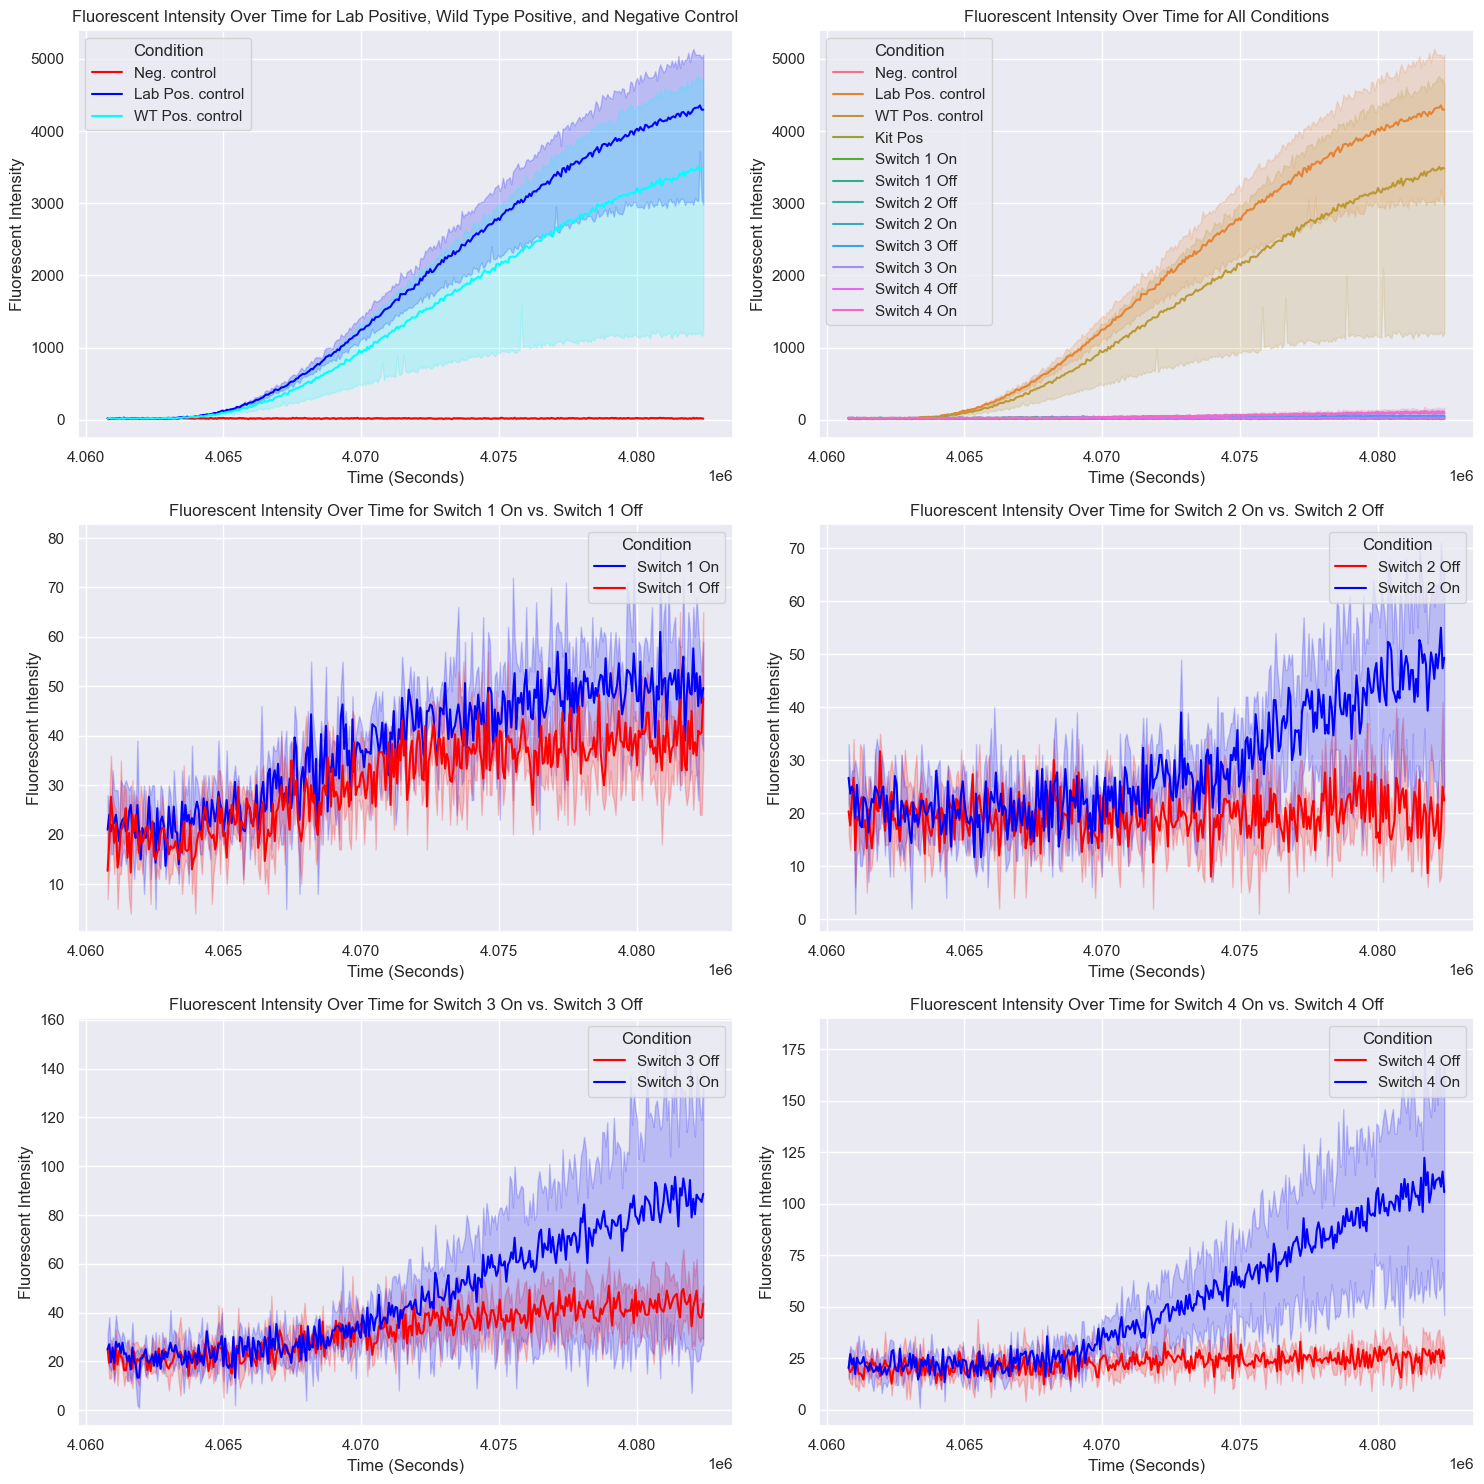

In [85]:
num_switches = 4

# Create subplots with multiple rows and columns
num_rows = num_switches // 2 + 1  # You can adjust the number of rows as needed
num_cols = 2  # You can adjust the number of columns as needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Plot Controls
lab_pos_control = triplicate.loc[triplicate["Label"].isin(["Lab Pos. control", "Neg. control", "WT Pos. control"]), :]
sb.lineplot(x="Seconds", y="Intensity", 
            hue="Label", 
            palette={"Neg. control": "red", "Lab Pos. control": "blue", "WT Pos. control": "cyan"}, # fix if you hate the plot colors
            data=lab_pos_control, 
            ax=axes[0])
axes[0].set_xlabel("Time (Seconds)")
axes[0].set_ylabel("Fluorescent Intensity")
axes[0].set_title("Fluorescent Intensity Over Time for Lab Positive, Wild Type Positive, and Negative Control")
axes[0].legend(title="Condition")

# All
sb.lineplot(x="Seconds", y="Intensity", 
            hue="Label", 
            data=triplicate, 
            ax=axes[1])
axes[1].set_xlabel("Time (Seconds)")
axes[1].set_ylabel("Fluorescent Intensity")
axes[1].set_title("Fluorescent Intensity Over Time for All Conditions")
axes[1].legend(title="Condition")

# Iterate over switch labels
for j in range(num_switches):
    # Select relevant data for the current switch
    i = j + 2 # Make space on the top of the plot for the controls
    switch_label = f"Switch {j + 1}"
    switch_data = triplicate.loc[triplicate["Label"].isin([ f"{switch_label} Off", f"{switch_label} On"]), : ]

    # Create a line plot on the current subplot
    sb.lineplot(x="Seconds", y="Intensity", 
                hue="Label", 
                palette={f"{switch_label} Off": "red", f"{switch_label} On": "blue"}, # fix if you hate the plot colors
                data=switch_data, 
                ax=axes[i])

    # Set plot labels and title
    axes[i].set_xlabel("Time (Seconds)")
    axes[i].set_ylabel("Fluorescent Intensity")
    axes[i].set_title(f"Fluorescent Intensity Over Time for {switch_label} On vs. {switch_label} Off")

    # Show the legend
    axes[i].legend(title="Condition")

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [68]:
data_melted['Label'].unique()

array(['Neg. control', 'Lab Pos. control', 'WT Pos. control', 'Kit Pos',
       'Switch 1 On', 'Switch 1 Off', 'Switch 2 Off', 'Switch 2 On',
       'Switch 3 Off', 'Switch 3 On', 'Switch 4 Off', 'Switch 4 On'],
      dtype=object)